6.735100518422937
   CHR         SNP       BP A1 TEST  NMISS      OR    STAT       P
0    1   rs3934834  1045729  T  ADD   4800  0.9785 -0.4540  0.6499
1    1   rs6687776  1070488  T  ADD   4800  1.0110  0.2342  0.8148
2    1   rs9651273  1071463  A  ADD   4800  0.9909 -0.2141  0.8305
3    1  rs12726255  1089873  G  ADD   4800  1.0000  0.0000  1.0000
4    1   rs2298217  1104902  T  ADD   4800  1.0210  0.3076  0.7584


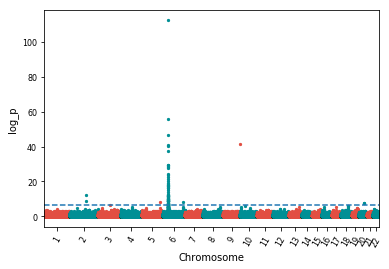

In [10]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

associations_file = 'C:/plink/plink.assoc.logistic'

df = pd.read_csv(associations_file, sep='\\s+')

bonferroni_cutoff = -np.log10(1.840346e-07)
print(bonferroni_cutoff)

print(df.head())

df['ind'] = range(len(df))
df['log_p'] = -np.log10(df['P'])
df_grouped = df.groupby(('CHR'))


fig = plt.figure()
ax = fig.add_subplot(111)

colors = ['#E24E42','#008F95']
x_labels = []
x_labels_pos = []

for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='log_p', color=colors[num % len(colors)], ax=ax, s=5)
    x_labels.append(name)
#     print(group)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0]) / 2))
    
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)
ax.set_xlim([0, len(df)])
# ax.set_ylim([0, 7])
ax.set_xlabel('Chromosome')
ax.axhline(y=bonferroni_cutoff, linestyle='dashed')

plt.xticks(fontsize = 8,rotation=60)
plt.yticks(fontsize = 8)

# xticks = ax.xaxis.get_major_ticks()
# xticks[0].set_visible(False)

plt.show()